<a href="https://colab.research.google.com/github/Mannansinghvi/Cryptocurrency_data_analysis/blob/main/EDA_Cryptocurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_datareader

In [2]:
!pip install plotly

In [3]:
!pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 26.7 MB/s eta 0:00:00


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
from matplotlib.ticker import ScalarFormatter


<strong>Merging all data csv of crypotcurrencies</strong>

In [6]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))


Files in '/content': ['.config', 'sample_data']


In [9]:
df= pd.DataFrame()
for file in os.listdir("Data"):
    if file.endswith(".csv"):
        df=pd.concat([df,pd.read_csv(os.path.join("Data",file),infer_datetime_format=True)],axis=0)
df.reset_index(drop=True, inplace=True)
df.drop('SNo',axis=1, inplace= True)

In [10]:
df.head()

Name Symbol                 Date      High       Low      Open     Close  \
0  IOTA  MIOTA  2017-06-14 23:59:59  0.606196  0.495745  0.592347  0.528916   
1  IOTA  MIOTA  2017-06-15 23:59:59  0.543165  0.300365  0.528284  0.363661   
2  IOTA  MIOTA  2017-06-16 23:59:59  0.448249  0.309852  0.353285  0.410757   
3  IOTA  MIOTA  2017-06-17 23:59:59  0.444205  0.414139  0.426762  0.419906   
4  IOTA  MIOTA  2017-06-18 23:59:59  0.426069  0.393790  0.420597  0.405862   

       Volume     Marketcap  Unnamed: 0  
0  14194900.0  1.470138e+09         NaN  
1  10300400.0  1.010807e+09         NaN  
2   6920690.0  1.141712e+09         NaN  
3   3100660.0  1.167141e+09         NaN  
4   2514450.0  1.128106e+09         NaN

In [13]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True).dt.date
df

Name Symbol        Date       High        Low       Open  \
0          IOTA  MIOTA  2017-06-14   0.606196   0.495745   0.592347   
1          IOTA  MIOTA  2017-06-15   0.543165   0.300365   0.528284   
2          IOTA  MIOTA  2017-06-16   0.448249   0.309852   0.353285   
3          IOTA  MIOTA  2017-06-17   0.444205   0.414139   0.426762   
4          IOTA  MIOTA  2017-06-18   0.426069   0.393790   0.420597   
...         ...    ...         ...        ...        ...        ...   
53788  Polkadot    DOT  2021-07-02  15.469187  14.675115  15.219061   
53789  Polkadot    DOT  2021-07-03  15.776978  15.068263  15.321934   
53790  Polkadot    DOT  2021-07-04  16.579445  15.221813  15.553584   
53791  Polkadot    DOT  2021-07-05  15.996540  14.788740  15.996540   
53792  Polkadot    DOT  2021-07-06  16.162344  15.210810  15.240785   

           Close        Volume     Marketcap  Unnamed: 0  
0       0.528916  1.419490e+07  1.470138e+09         NaN  
1       0.363661  1.030040e+07  1.010807e+09         NaN  
2       0.410757  6.920690e+06  1.141712e+09         NaN  
3       0.419906  3.100660e+06  1.167141e+09         NaN  
4       0.405862  2.514450e+06  1.128106e+09         NaN  
...          ...           ...           ...         ...  
53788  15.340774  7.531948e+08  1.468349e+10         NaN  
53789  15.553716  7.112351e+08  1.489035e+10         NaN  
53790  16.014026  7.520759e+08  1.533547e+10         NaN  
53791  15.235582  8.448446e+08  1.459323e+10         NaN  
53792  16.143564  1.001573e+09  1.546772e+10         NaN  

[53793 rows x 10 columns]

In [14]:
df.to_csv('finali1.csv')

### Finding the top5 currencies by market cap

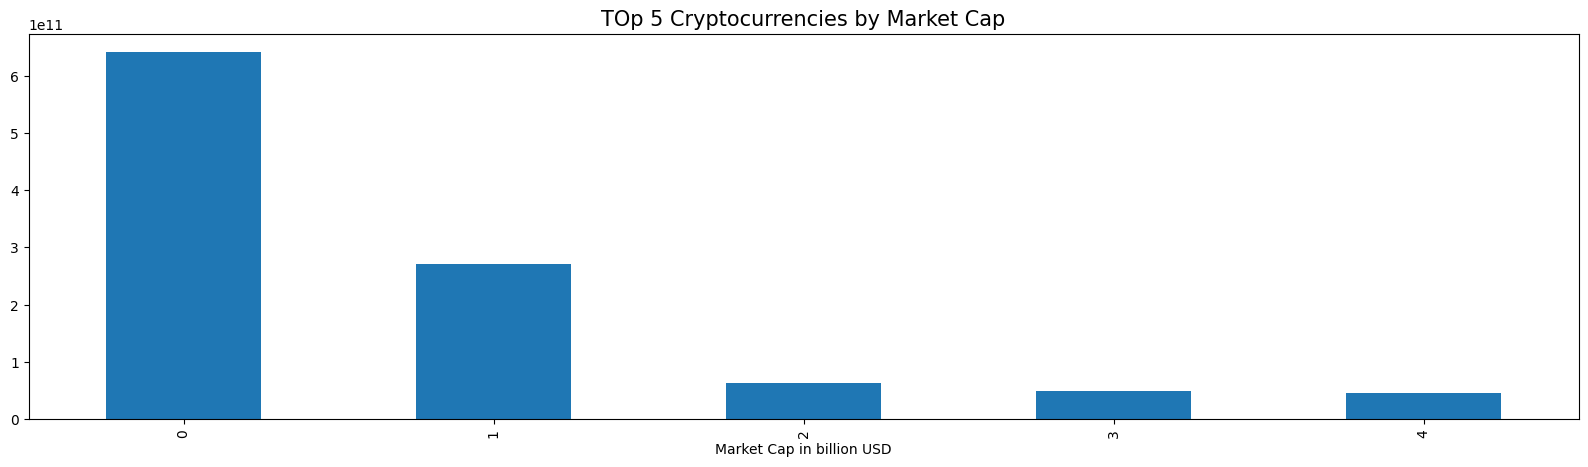

In [15]:
plt.figure(figsize=(20,5))
ax=df.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).plot(kind='bar')
ax.set_xlabel("Market Cap in billion USD")
ax.get_xaxis().set_major_formatter(ScalarFormatter())
plt.title("TOp 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()

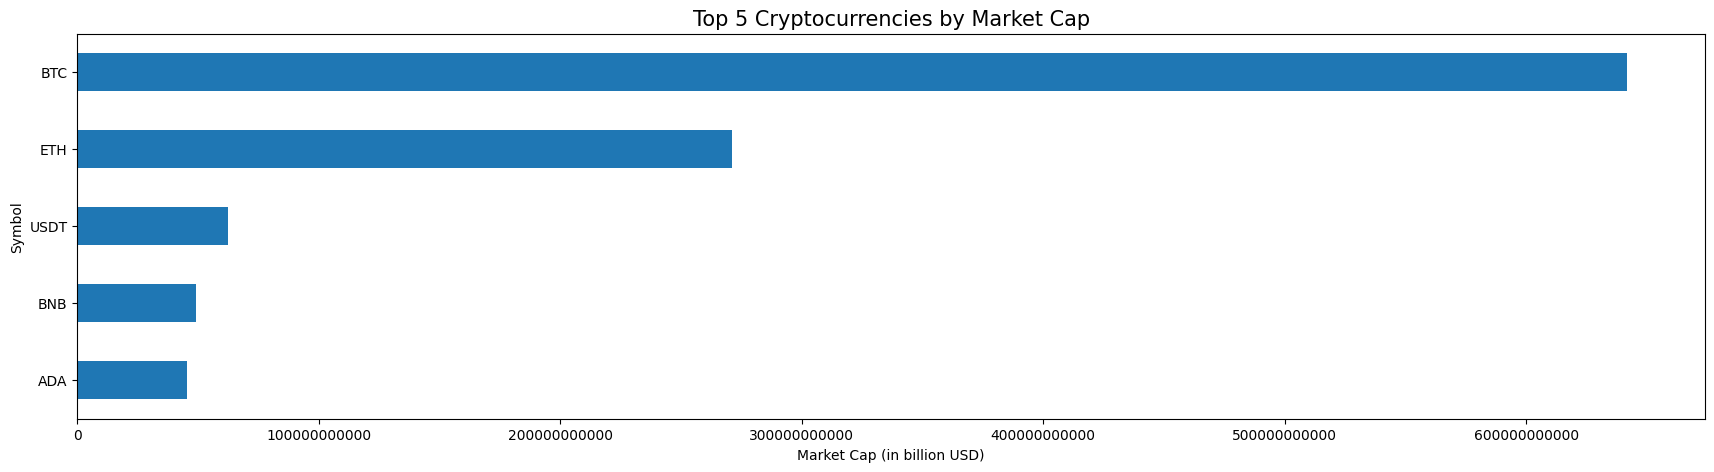

In [16]:
plt.figure(figsize=(21,5))
ax = df.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("Market Cap (in billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()

# Observation:
Here we can see that Bitcoin is the highest value according to market cap and etherum is 50% of it. and all other are very less in comparison to it and USDT is 3 times less then the Etherum

# Plotting Graphs of Closing Prices of Top 4 Cryptocurrencies as per Market Cap

In [17]:
dx= df.copy()
dx.head(2)

Name Symbol        Date      High       Low      Open     Close  \
0  IOTA  MIOTA  2017-06-14  0.606196  0.495745  0.592347  0.528916   
1  IOTA  MIOTA  2017-06-15  0.543165  0.300365  0.528284  0.363661   

       Volume     Marketcap  Unnamed: 0  
0  14194900.0  1.470138e+09         NaN  
1  10300400.0  1.010807e+09         NaN

In [18]:
top_4_currency_names= dx.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending= False).head(4).index
top_4_currency_names_except_first=dx[dx['Symbol']!='BTC'].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two_three=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')& (dx['Symbol']!='USDT')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index

top_4_currency_names

Index(['BTC', 'ETH', 'USDT', 'BNB'], dtype='object', name='Symbol')

In [19]:
data_top_4_currencies= dx[dx['Symbol'].isin(top_4_currency_names)]
top_4_currencies_after_BTC = dx[dx['Symbol'].isin(top_4_currency_names_except_first)]
top_4_currencies_after_BTC_ETH = dx[dx['Symbol'].isin(top_4_currency_names_except_first_two)]
top_4_currencies_after_BTC_ETH_USDT = dx[dx['Symbol'].isin(top_4_currency_names_except_first_two_three)]
data_top_4_currencies.head(2)

Name Symbol        Date     High       Low      Open     Close  \
7077  Ethereum    ETH  2015-08-08  2.79881  0.714725  2.793760  0.753325   
7078  Ethereum    ETH  2015-08-09  0.87981  0.629191  0.706136  0.701897   

        Volume     Marketcap  Unnamed: 0  
7077  674188.0  4.548689e+07         NaN  
7078  532170.0  4.239957e+07         NaN

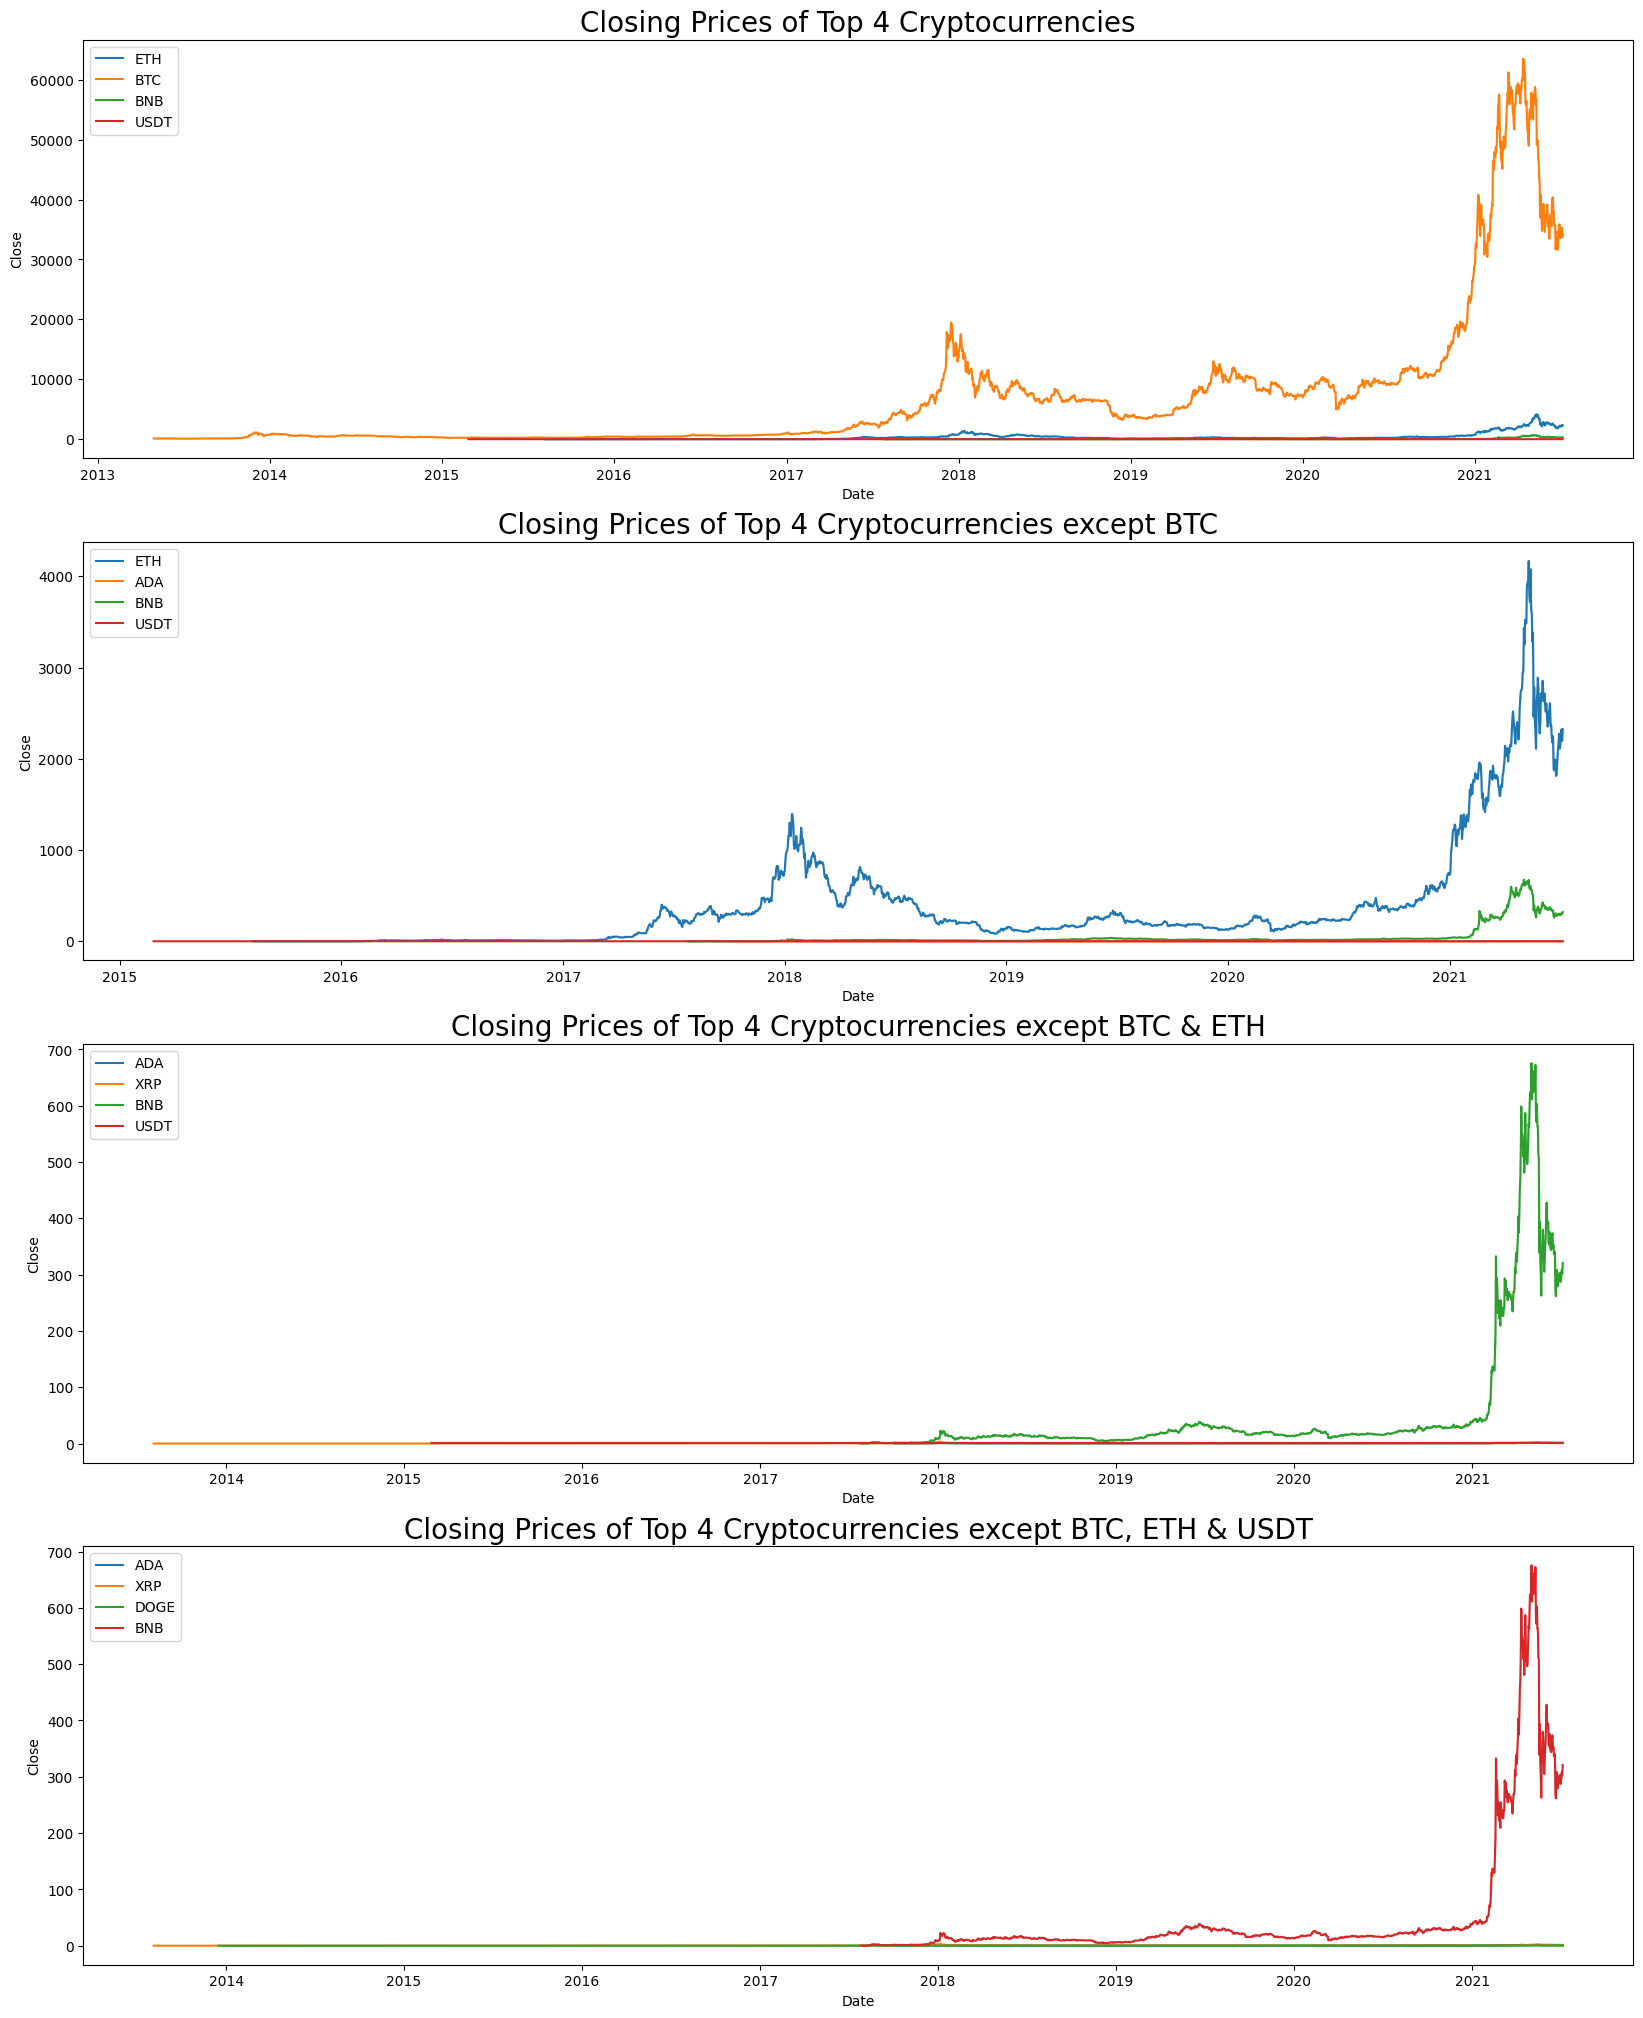

In [34]:
plt.figure(figsize=(20,25))

plt.subplot(4,1,1)
sns.lineplot(data=data_top_4_currencies, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(4,1,2)
sns.lineplot(data=top_4_currencies_after_BTC, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(4,1,3)
sns.lineplot(data=top_4_currencies_after_BTC_ETH,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC & ETH", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(4,1,4)
sns.lineplot(data=top_4_currencies_after_BTC_ETH_USDT,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC, ETH & USDT", fontsize=20)
plt.legend(loc='upper left')

plt.show()

## Observation:
In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.

In [22]:
for i in ['BTC','ETH','USDT',"ADA"]:
    options=[i]
    rslt_df= df[df['Symbol'].isin(options)]
    layout = dict(
    title=f"{i} Candlestick Chart",
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Time')),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Price US Dollars'))
)
    data=[go.Candlestick(x=rslt_df['Date'],
                    open=rslt_df['Open'],
                    high=rslt_df['High'],
                    low=rslt_df['Low'],
                    close=rslt_df['Close'])]
    figSignal = go.Figure(data=data,layout=layout)
    figSignal.show()

# Observation:¶
Investment in penny cryptocurrencies should be avoided, as depicted by the candlestick chart of USDT.

It is visible in the candlestick chart of USDT that this cryptocurrency is volatile for a longer period.

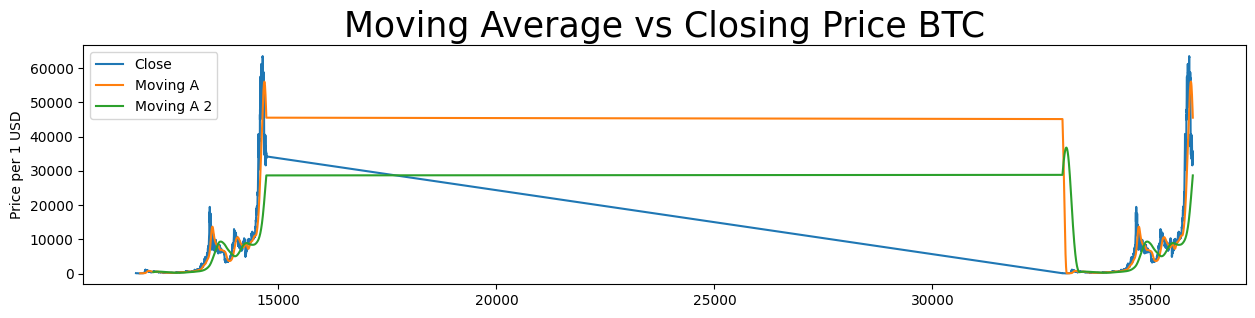

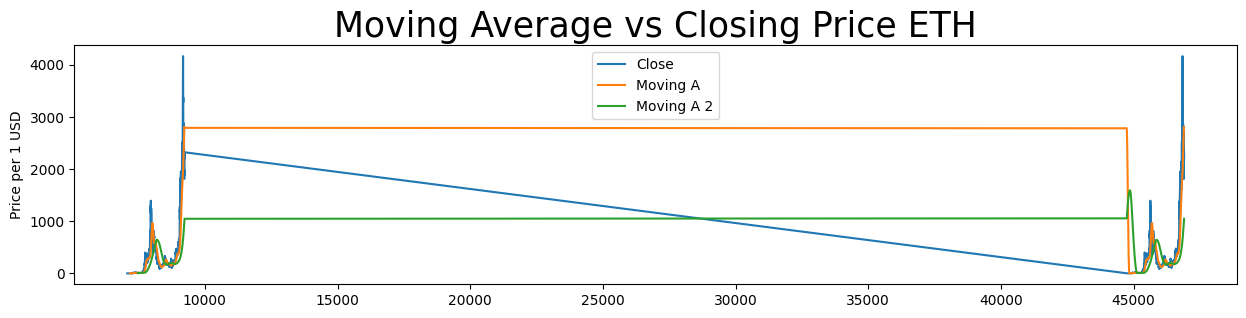

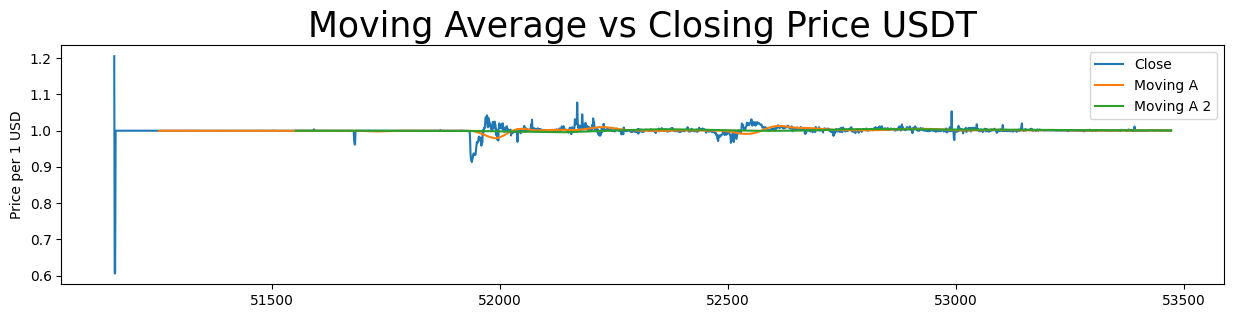

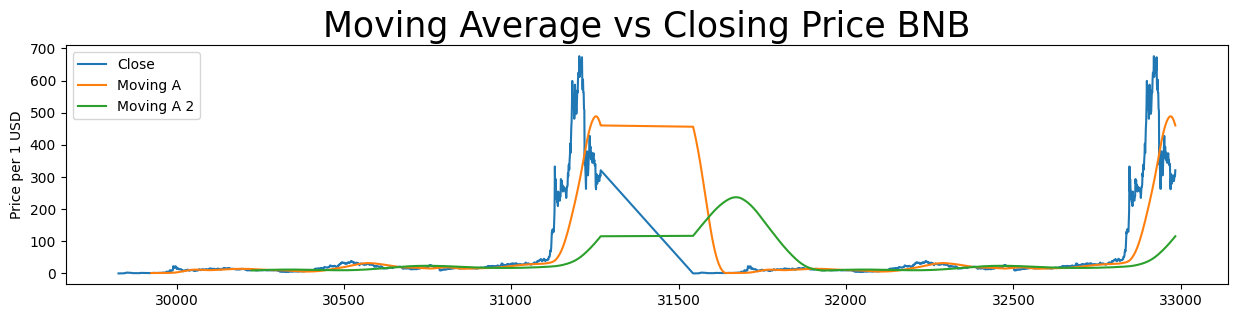

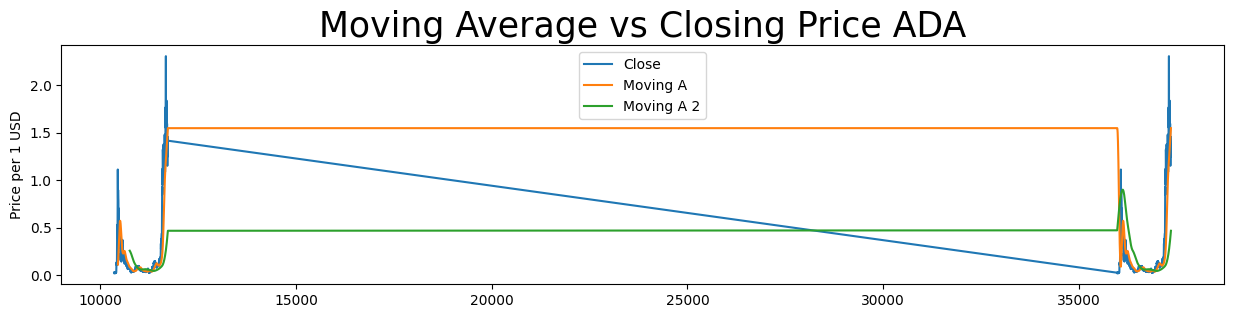

In [23]:
for i in ['BTC','ETH','USDT','BNB','ADA']:
    j=1
    dft=df[df['Symbol']==i]
    top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
    top_currency = dft[dft['Symbol'].isin(top_currency_name)]
    top_currency['Moving A']=top_currency['Close'].rolling(window=50).mean()
    top_currency['Moving A 2']=top_currency['Close'].rolling(window=200).mean()
    plt.subplot(5,1,j)
    top_currency['Close'].plot(figsize=(15,18))
    ax=top_currency['Moving A'].rolling(window=50).mean().plot()
    ax=top_currency['Moving A 2'].rolling(window=200).mean().plot()
    ax.set_ylabel("Price per 1 USD");
    plt.title(f"Moving Average vs Closing Price {i}", fontsize=25);
    plt.legend()
    j=j+1
    plt.show()

In [33]:
# for i in ['BTC', 'ETH', 'USDT', 'BNB', 'ADA']:
#     dft = df[df['Symbol'] == i]
#     top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
#     top_currency = dft[dft['Symbol'].isin(top_currency_name)]
#     top_currency['Moving Average'] = top_currency['Close'].rolling(window=50).mean()
#     top_currency['Moving Average 2'] = top_currency['Close'].rolling(window=200).mean()

#     plt.figure(figsize=(15, 18))
#     plt.subplot(5, 1, 1)
#     top_currency['Close'].plot()
#     top_currency['Moving Average'].plot()
#     top_currency['Moving Average 2'].plot()
#     plt.ylabel("Price per 1 USD")
#     plt.title(f"Moving Average vs Closing Price {i}", fontsize=25)
#     plt.legend(['Closing Price', 'Moving Average (50-day)', 'Moving Average (200-day)'])
#     plt.show()



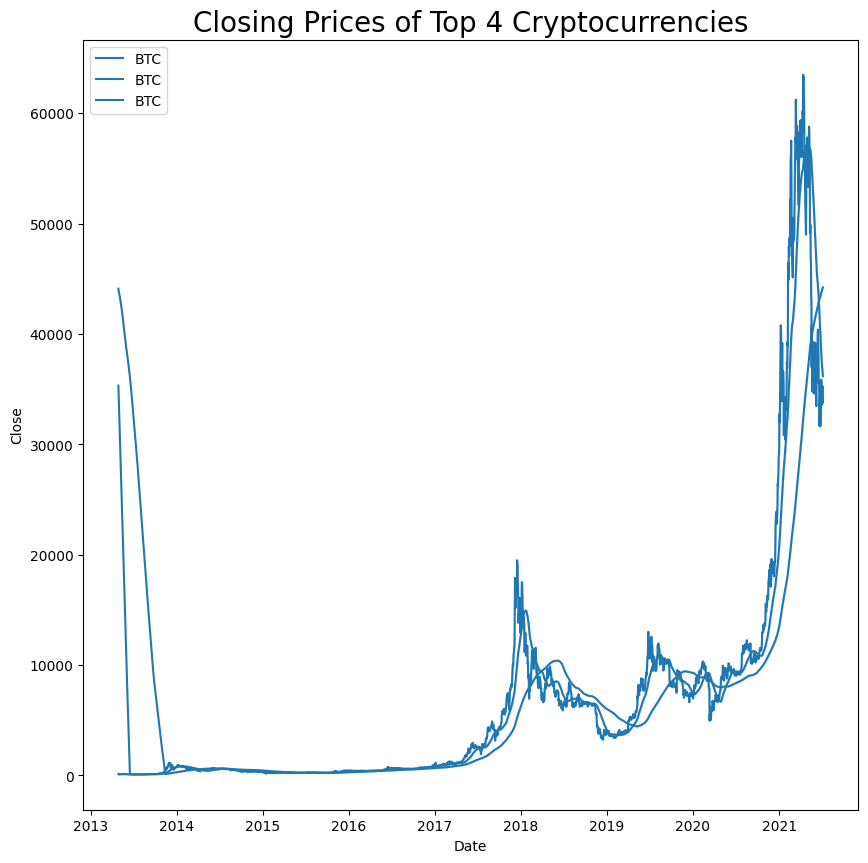

In [32]:
top_4_currency_names = dx.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(1).index
top_currency = dx[dx['Symbol'].isin(top_4_currency_names)].copy()
top_currency['Moving Average'] = top_currency['Close'].rolling(window=50).mean()
top_currency['Moving Average 2'] = top_currency['Close'].rolling(window=200).mean()

plt.figure(figsize=(10, 10))
sns.lineplot(data=top_currency, x="Date", y="Close", hue='Symbol')
sns.lineplot(data=top_currency, x="Date", y="Moving Average", hue='Symbol')
sns.lineplot(data=top_currency, x="Date", y="Moving Average 2", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies", fontsize=20)
plt.legend(loc='upper left')
plt.show()


In [25]:
# fig, axs = plt.subplots(5, 1, figsize=(15, 18))

# for i, symbol in enumerate(['BTC', 'ETH', 'USDT', 'BNB', 'ADA']):
#     dft = df[df['Symbol'] == symbol]
#     top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
#     top_currency = dft[dft['Symbol'].isin(top_currency_name)]
#     top_currency['Moving Average'] = top_currency['Close'].rolling(window=50).mean()
#     top_currency['Moving Average 2'] = top_currency['Close'].rolling(window=200).mean()

#     ax = axs[i]
#     ax.plot(top_currency['Date'], top_currency['Close'])
#     ax.plot(top_currency['Date'], top_currency['Moving Average'])
#     ax.plot(top_currency['Date'], top_currency['Moving Average 2'])
#     ax.set_ylabel("Amount")
#     ax.set_title(f"Moving Average vs Closing Price {symbol}", fontsize=15)

# plt.legend()

# plt.tight_layout()
# plt.show()


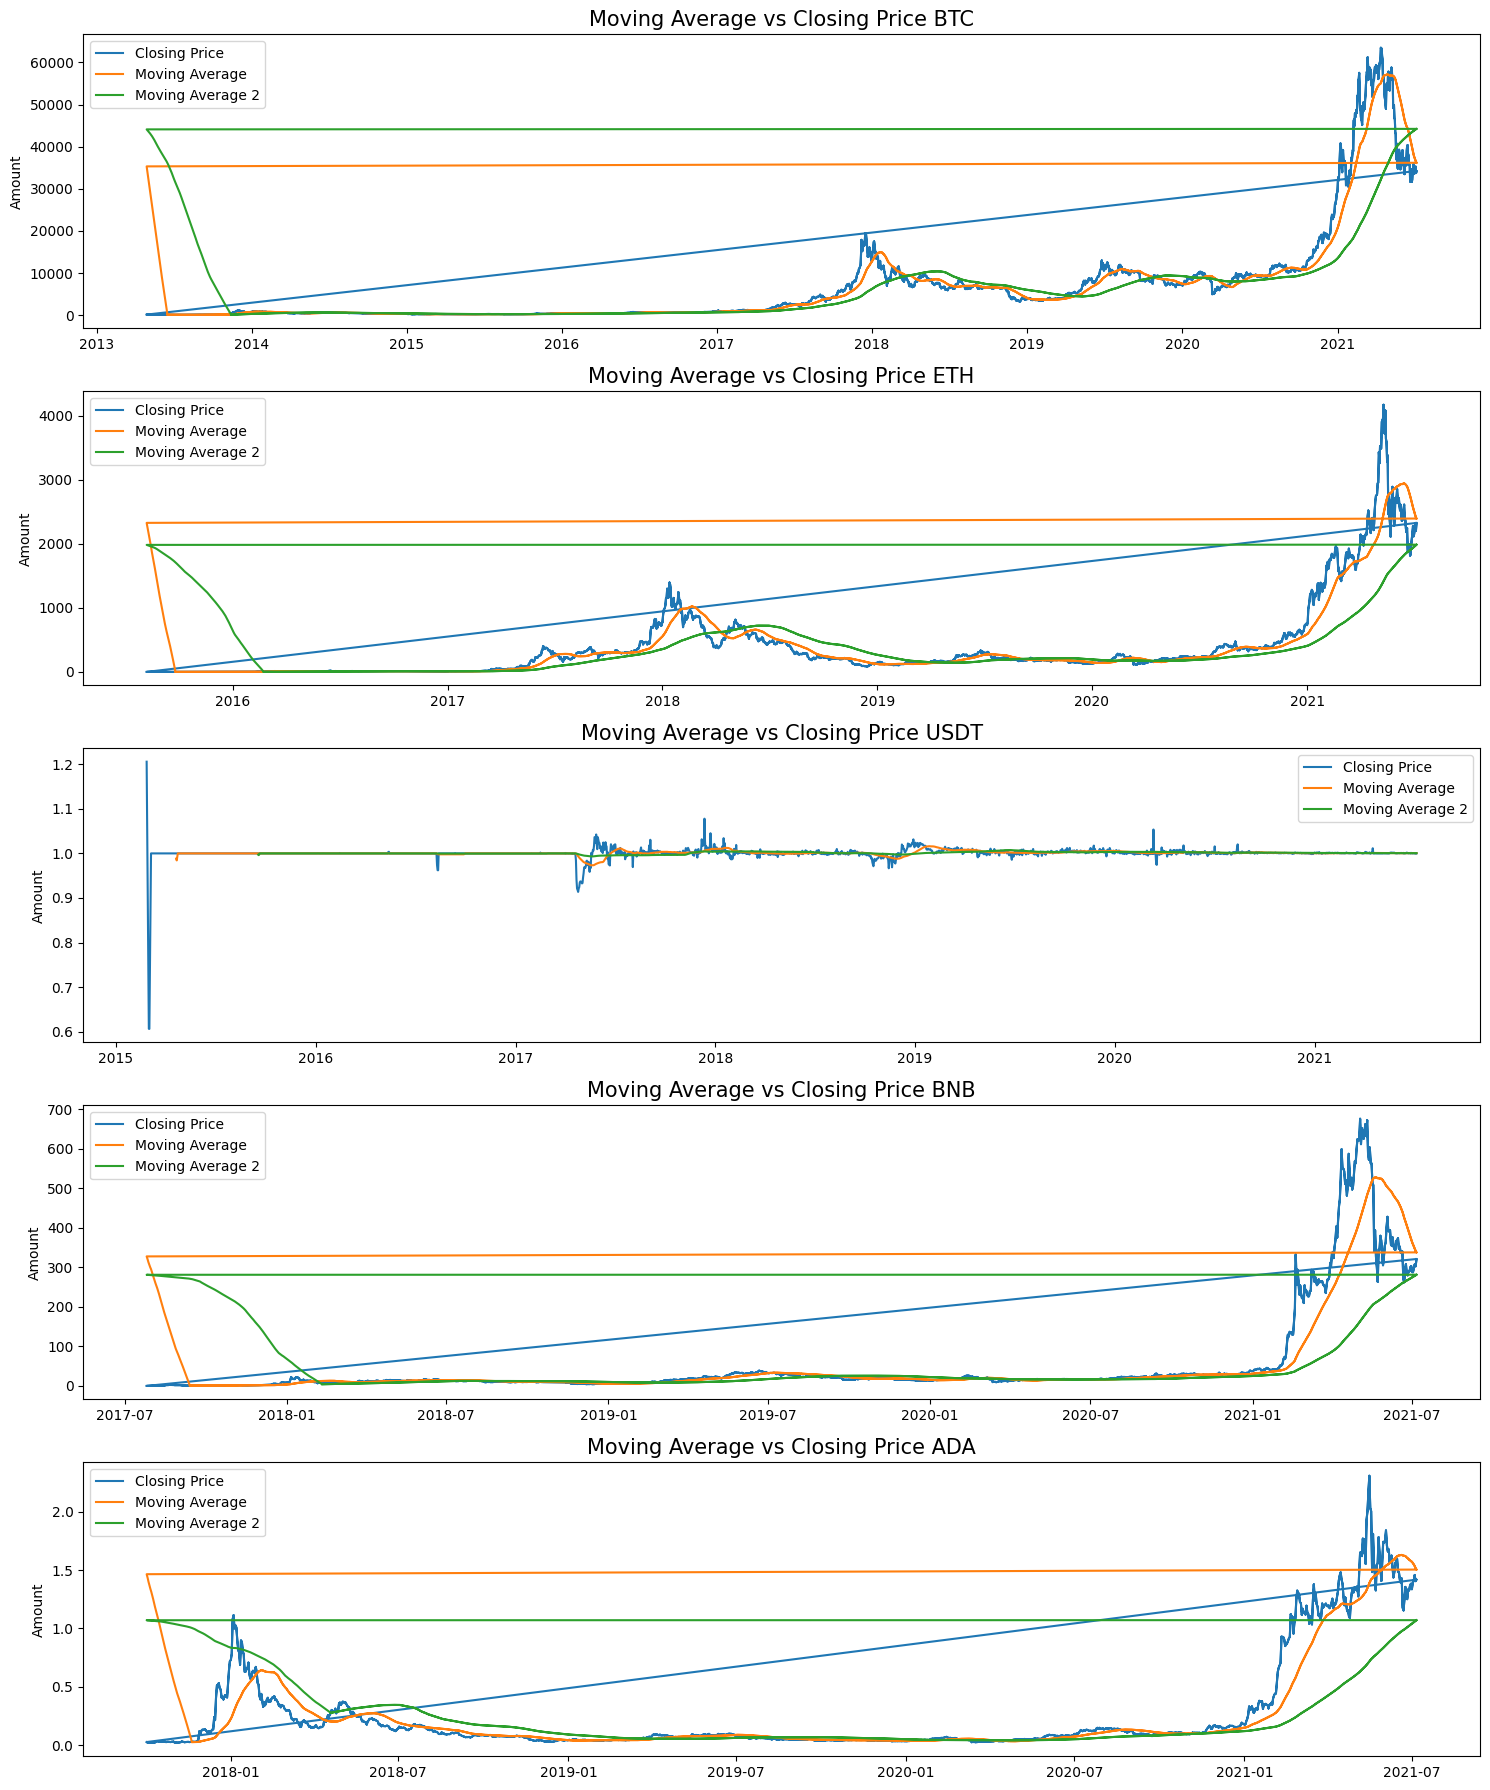

In [26]:
fig, axs = plt.subplots(5, 1, figsize=(15, 18))

for i, symbol in enumerate(['BTC', 'ETH', 'USDT', 'BNB', 'ADA']):
    dft = df[df['Symbol'] == symbol]
    top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
    top_currency = dft[dft['Symbol'].isin(top_currency_name)]
    top_currency['Moving Average'] = top_currency['Close'].rolling(window=50).mean()
    top_currency['Moving Average 2'] = top_currency['Close'].rolling(window=200).mean()
#     print(top_currency.tail(2))
    ax = axs[i]
    ax.plot(top_currency['Date'], top_currency['Close'], label='Closing Price')
    ax.plot(top_currency['Date'], top_currency['Moving Average'], label='Moving Average')
    ax.plot(top_currency['Date'], top_currency['Moving Average 2'], label='Moving Average 2')
    ax.set_ylabel("Amount")
    ax.set_title(f"Moving Average vs Closing Price {symbol}", fontsize=15)
    ax.legend()

plt.tight_layout()
plt.show()


In [27]:
# fig, axs = plt.subplots(5, 1, figsize=(15, 18))

# for i, symbol in enumerate(['BTC', 'ETH', 'USDT', 'BNB', 'ADA']):
#     dft = df[df['Symbol'] == symbol]
#     top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
#     top_currency = dft[dft['Symbol'].isin(top_currency_name)]
#     top_currency['Moving Average'] = top_currency['Close'].rolling(window=50).mean()
#     top_currency['Moving Average 2'] = top_currency['Close'].rolling(window=200).mean()

#     ax = axs[i]
#     ax.plot(top_currency['Date'], top_currency['Close'], label='Closing Price')
#     if not top_currency['Moving Average'].isnull().all():
#         ax.plot(top_currency['Date'], top_currency['Moving Average'], label='Moving Average')
#     if not top_currency['Moving Average 2'].isnull().all():
#         ax.plot(top_currency['Date'], top_currency['Moving Average 2'], label='Moving Average 2')

#     ax.set_ylabel("Amount")
#     ax.set_title(f"Moving Average vs Closing Price {symbol}", fontsize=15)
#     ax.legend()

# plt.tight_layout()
# plt.show()


In [28]:
top_currency.head()

Name Symbol        Date      High       Low      Open     Close  \
10357  Cardano    ADA  2017-10-02  0.030088  0.019969  0.024607  0.025932   
10358  Cardano    ADA  2017-10-03  0.027425  0.020690  0.025757  0.020816   
10359  Cardano    ADA  2017-10-04  0.022806  0.020864  0.020864  0.021931   
10360  Cardano    ADA  2017-10-05  0.022154  0.020859  0.021951  0.021489   
10361  Cardano    ADA  2017-10-06  0.021542  0.018360  0.021359  0.018539   

           Volume     Marketcap  Unnamed: 0  Moving Average  Moving Average 2  
10357  57641300.0  6.288991e+08         NaN             NaN               NaN  
10358  16997800.0  5.396927e+08         NaN             NaN               NaN  
10359   9000050.0  5.686195e+08         NaN             NaN               NaN  
10360   5562510.0  5.571390e+08         NaN             NaN               NaN  
10361   7780710.0  4.806646e+08         NaN             NaN               NaN

### Observation:

In BTC and ETH

They have shown a pattern of 2 golden cross and 2 death cross over the years.
The last crossing point of moving averages was golden cross hence it was bullish.

In USDT

There are too many golden cross and death cross.
Hence it is a volatile stock and should be avoided for the time being.

In [29]:
import plotly.express as px

In [30]:
area = px.area(data_frame= df , x = "Date" ,y= "High", line_group="Name" , color = "Name" , color_discrete_sequence=px.colors.qualitative.Alphabet_r,title = 'Area Plot for TOP Cryptocurrencies')

area.update_xaxes(
    title_text = 'Date',rangeslider_visible = True,rangeselector = dict(buttons = list([dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

area.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
area.update_layout(showlegend = True,title = {'text': 'Area Plot for TOP Cryptocurrencies','y':0.9,'x':0.5,'xanchor': 'center',
                                              'yanchor': 'top'})

area.show()

In [31]:
area = px.area(data_frame = df,y  = "Marketcap" , x = "Date" , line_group="Name", color = "Name",color_discrete_sequence=px.colors.qualitative.Alphabet, title = 'Market Cap Change of all Cryptocurrencies')

area.update_xaxes(title_text = 'Date',rangeslider_visible = True,rangeselector = dict(buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

area.update_yaxes(title_text = 'Percentage Change ', ticksuffix = '%')
area.update_layout(showlegend = True,title = {'text': 'MarKet Cap Change of all Cryptocurrencies','y':0.1,'x':0.5,'xanchor': 'center','yanchor': 'top'})

area.show()

# Conclusion:
Bitcoin is the highest value according to market cap and etherum is 50% of it and all other are very less in comperision to it and USDT is 3 times less then the Etherum

Investment in penny cryptocurrencies should be avoided, as depicted by the candlestick chart of USDT.

It is visible in the candlestick chart of USDT that this cryptocurrency is volatile for a longer period.

In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.

In BTC and ETH --They have shown a pattern of 2 golden cross and 2 death cross over the years. The last crossing point of moving averages was golden cross hence it was bullish.

In USDT -- There are too many golden cross and death cross. Hence it is a volatile stock and should be avoided for the time being.